ЗАВДАННЯ 3b

In [ ]:
import nbformat

# Відкриваємо ноутбук
nb = nbformat.read("IAD_lab4_3.ipynb", as_version=4)

# Видаляємо widgets
if "widgets" in nb.metadata:
    nb.metadata.pop("widgets")

# Зберігаємо чистий ноутбук
nbformat.write(nb, "IAD_lab4_3(1).ipynb")


In [3]:
from transformers import pipeline
import torch

device = 0 if torch.cuda.is_available() else -1

classifier = pipeline(
    "zero-shot-classification",
    model="MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7",
    device=device
)


sequence_to_classify = "Україна активно розвиває кібербезпеку та захист інформаційних систем."


candidate_labels = [
    "кібербезпека",
    "політика",
    "економіка",
    "спорт",
    "розваги"
]

result = classifier(
    sequence_to_classify,
    candidate_labels,
    multi_label=False
)

print(result)


Device set to use cpu


{'sequence': 'Україна активно розвиває кібербезпеку та захист інформаційних систем.', 'labels': ['політика', 'кібербезпека', 'розваги', 'економіка', 'спорт'], 'scores': [0.679063618183136, 0.2923469841480255, 0.017556799575686455, 0.006085269618779421, 0.0049472893588244915]}


In [2]:
import re
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM


WHITESPACE_HANDLER = lambda text: re.sub(
    r'\s+', ' ',
    re.sub(r'\n+', ' ', text.strip())
)


article_text = """
Україна є незалежною європейською державою з багатою історією та культурною спадщиною.
Останніми роками країна активно розвиває цифрові технології, електронне урядування
та сферу кібербезпеки. Українські ІТ-фахівці відомі у всьому світі, а держава
впроваджує сучасні рішення для захисту інформаційних ресурсів та критичної
інфраструктури. Попри складні виклики, Україна продовжує рух у напрямку
європейської інтеграції та зміцнення національної безпеки.
"""


model_name = "csebuetnlp/mT5_multilingual_XLSum"


tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)


input_ids = tokenizer(
    [WHITESPACE_HANDLER(article_text)],
    return_tensors="pt",
    padding="max_length",
    truncation=True,
    max_length=512
)["input_ids"]


output_ids = model.generate(
    input_ids=input_ids,
    max_length=80,
    no_repeat_ngram_size=2,
    num_beams=4
)[0]


summary = tokenizer.decode(
    output_ids,
    skip_special_tokens=True,
    clean_up_tokenization_spaces=False
)

print("=== ОРИГІНАЛЬНИЙ ТЕКСТ ===")
print(article_text)

print("\n=== КОРОТКИЙ ВИКЛАД (SUMMARY) ===")
print(summary)


You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.12/dist-packages/transformers/convert_slow_tokenizer.py:566: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


=== ОРИГІНАЛЬНИЙ ТЕКСТ ===

Україна є незалежною європейською державою з багатою історією та культурною спадщиною.
Останніми роками країна активно розвиває цифрові технології, електронне урядування
та сферу кібербезпеки. Українські ІТ-фахівці відомі у всьому світі, а держава
впроваджує сучасні рішення для захисту інформаційних ресурсів та критичної
інфраструктури. Попри складні виклики, Україна продовжує рух у напрямку
європейської інтеграції та зміцнення національної безпеки.


=== КОРОТКИЙ ВИКЛАД (SUMMARY) ===
Україна - одна з найбільших європейських країн.


In [5]:
translator = pipeline(
    "translation",
    model="Helsinki-NLP/opus-mt-en-uk"
)

text_en = "Cybersecurity is a critical part of modern information systems."

translated = translator(text_en)

print(translated[0]["translation_text"])


Device set to use cpu


Кібербезпека - невід'ємна частина сучасних інформаційних систем.


ЗАВДАННЯ 3с

/usr/local/lib/python3.12/dist-packages/torch/amp/autocast_mode.py:270: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


`torch_dtype` is deprecated! Use `dtype` instead!


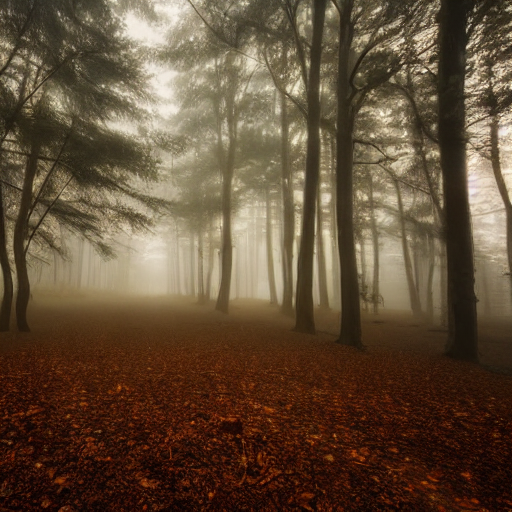

In [1]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float32
)

pipe = pipe.to("cpu")

prompt = "A quiet forest at sunrise with fog"




image = pipe(prompt).images[0]

image.save("generated_image.png")
image
